# Software Defect Detection


## 1. Introduction

Software defect detection is an application area that employs machine learning models for automatically identifying defective parts in programs.

In this assignment you will explore various classifiers with multiple datasets. The purpose is to measure the performance of the following well-established algorithms in software defect detection tasks.


### Classifiers
The classifiers to be studied are:
* $C_1$: Logistic Regression
* $C_2$: Perceptron
* $C_3$: Support Vector Machines (with linear &amp; RBF kernel)
* $C_4$: Decision Tree
* $C_5$: Random Forests
* $C_6$: Feed-forward Neural Network


### Datasets
The classification performance of the abovementioned algorithm will be studied in a collection of 3 datasets on software defect detection. The datasets are:

* `jm1` (Description [here](https://www.openml.org/search?type=data&status=active&id=1053))
* `mc1` (Description [here](https://www.openml.org/search?type=data&status=active&id=1056))
* `pc3` (Description [here](https://www.openml.org/search?type=data&status=active&id=1050))

**All datasets are provided with the assignment in the present compressed file.**

There cases of missing values in the datasets. These cases should be addressed by removing the **rows** with missing values.


## 2. Experiments

You will use 80% of the datasets for training and 20% for testing by applying the 5-fold cross validation technique. The algorithms will be evaluated by measuring the values of the four following well-established metrics:
* $M_1$: Accuracy
* $M_2$: F1-score
* $M_3$: G-Mean score
* $M_4$: Fit time

Repeat your experiments with different features' normalization methods:
* $N_1$: No normalization (use raw features)
* $N_2$: Min-max normalization
* $N_3$: Feature Standardization



## 3. Deliverable & Deadline

You will work in pairs according to your preferences.

The deliverable will be a notebook, using both surnames as a file name. This file should include the code and the results for each one of the 3 datasets. Both students of a team must upload the same file into the e-learning platform. **Only one file per pair will be checked. So, if you upload different versions, then one of them will not be examined. You are free to use any Python library, even if it is not a part of Anaconda3. However, in the latter case, please make sure that you mention the appropriate conda or pip command for installing the library.**

**For each dataset, your notebook should present:**

* 4 bar plots that will compare the performance ($M1$, $M2$, $M3$, and $M4$) of the six classifiers ($C1$, $C2$, $C3$, $C4$, $C5$, and $C6$) for the cases $N_1$, $N_2$, and $N_3$ (please consult the example in the figure below).
* A discussion on the performance of the classifiers.

**The deadline is 30/01/2024. NO DEADLINE EXTENSION WILL BE GIVEN.**

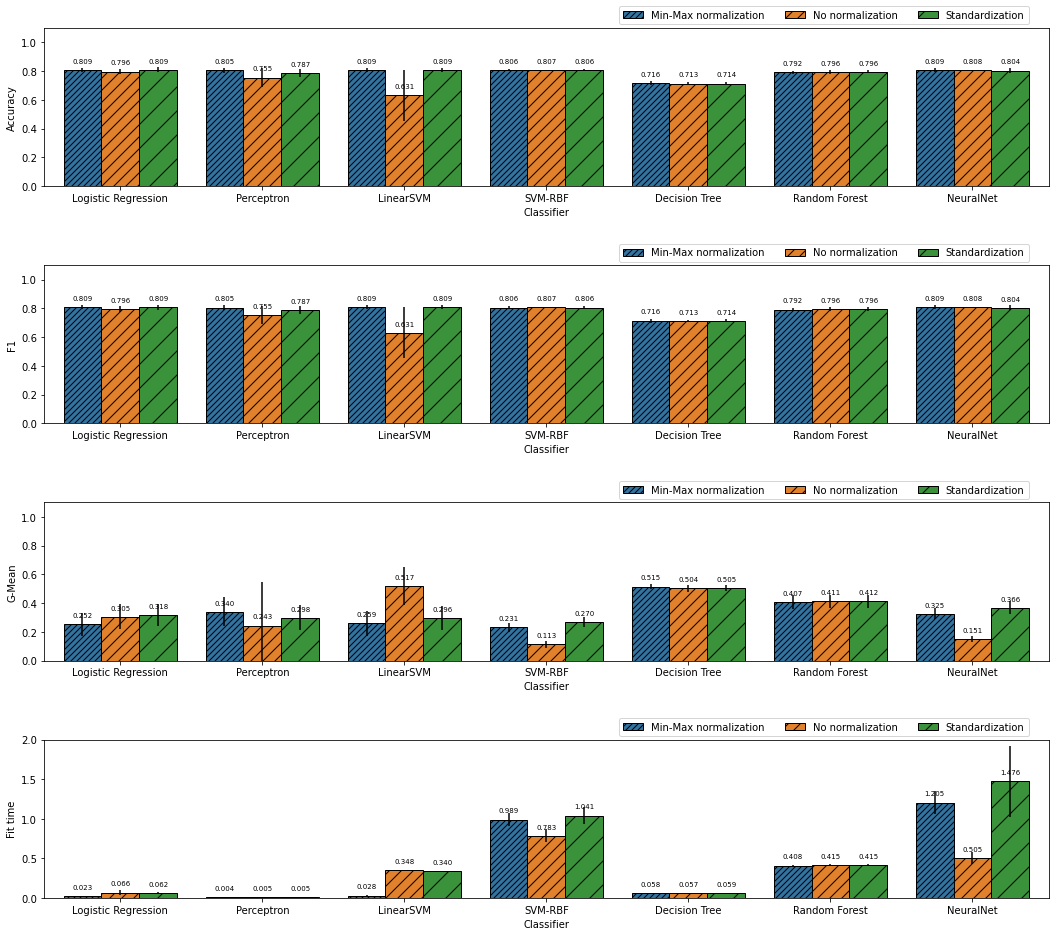

In [45]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
set1 = pd.read_csv('jm1.csv',sep=",")
set1.replace('?', float(0), inplace=True)

Y = np.array(set1.iloc[:, 21].astype(int))

X = np.array(set1.iloc[:, :21])


In [46]:
from sklearn.model_selection import cross_validate, ShuffleSplit
from sklearn.metrics import make_scorer, f1_score, accuracy_score, balanced_accuracy_score
from sklearn.linear_model import LogisticRegression


scorers = {
    'accuracy_score': make_scorer(accuracy_score),
    'balanced_accuracy_score': make_scorer(balanced_accuracy_score),
    'f1_score': make_scorer(f1_score, average='weighted')
}

cv= 5 

cv_results = cross_validate(LogisticRegression(solver='liblinear',max_iter=1000), X, Y, cv=cv, scoring=scorers, return_train_score=True)

# print(cv_results)
print("Accuracy:", cv_results['test_accuracy_score'].mean())
print("Balanced Accuracy:", cv_results['test_balanced_accuracy_score'].mean())
print("F1:", cv_results['test_f1_score'].mean())




Accuracy: 0.8075333027101514
Balanced Accuracy: 0.5403052966571534
F1: 0.7515758859496309


In [47]:
from sklearn.pipeline import Pipeline

pipe = Pipeline([('scaler', StandardScaler()), ('logistic', LogisticRegression(solver='liblinear'))])
cv_resultsStandard = cross_validate(pipe, X, Y, cv=cv, scoring=scorers, return_train_score=True)
# print(cv_results)
print("Accuracy:", cv_resultsStandard['test_accuracy_score'].mean())
print("Balanced Accuracy:", cv_resultsStandard['test_balanced_accuracy_score'].mean())
print("F1:", cv_resultsStandard['test_f1_score'].mean())

Accuracy: 0.8086357372531007
Balanced Accuracy: 0.542791609555275
F1: 0.753485267089729


In [48]:
pipeMinMax = Pipeline([('scaler', MinMaxScaler()), ('logistic', LogisticRegression(solver='liblinear'))])
cv_resultsMinMax = cross_validate(pipeMinMax, X, Y, cv=cv, scoring=scorers, return_train_score=True)
print("Accuracy:", cv_resultsMinMax['test_accuracy_score'].mean())
print("Balanced Accuracy:", cv_resultsMinMax['test_balanced_accuracy_score'].mean())
print("F1:", cv_resultsMinMax['test_f1_score'].mean())

Accuracy: 0.8087276067983463
Balanced Accuracy: 0.528053404113726
F1: 0.7434313328115485


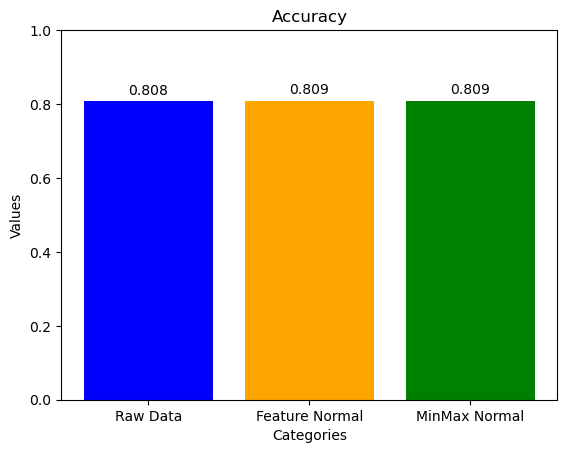

In [49]:
values = [cv_results['test_accuracy_score'].mean(),cv_resultsStandard['test_accuracy_score'].mean(),cv_resultsMinMax['test_accuracy_score'].mean()]
categories = ["Raw Data","Feature Normal","MinMax Normal"]
colors = ['blue', 'orange', 'green']
plt.bar(categories, values,color = colors)

for i, value in enumerate(values):
    plt.annotate(f'{value:.3f}', xy=(i, value), xytext=(i, value + 0.01), ha='center', va='bottom')  

plt.ylim(0,1)
plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Accuracy')

plt.show()

In [50]:
#Set2 Raw Data
set2 = pd.read_csv('mc1.csv',sep=",")

Y2 = np.array(set2.iloc[:, 38].astype(int))
X2 = np.array(set2.iloc[:,:38])

scorers2 = {
    'accuracy_score': make_scorer(accuracy_score),
    'balanced_accuracy_score': make_scorer(balanced_accuracy_score),
    'f1_score': make_scorer(f1_score, average='weighted')
}

cv= 5 

cv_results2 = cross_validate(LogisticRegression(solver='liblinear',max_iter=1000), X2, Y2, cv=cv, scoring=scorers2, return_train_score=True)

# print(cv_results)
print("Accuracy:", cv_results2['test_accuracy_score'].mean())
print("Balanced Accuracy:", cv_results2['test_balanced_accuracy_score'].mean())
print("F1:", cv_results2['test_f1_score'].mean())


Accuracy: 0.9933445679659011
Balanced Accuracy: 0.5875396908697499
F1: 0.9913467280760763


In [51]:
#Set 2 StandardScaling
pipe2 = Pipeline([('scaler', StandardScaler()), ('logistic', LogisticRegression(solver='liblinear'))])
cv_resultsStandard2 = cross_validate(pipe2, X2, Y2, cv=cv, scoring=scorers2, return_train_score=True)
# print(cv_results)
print("Accuracy:", cv_resultsStandard2['test_accuracy_score'].mean())
print("Balanced Accuracy:", cv_resultsStandard2['test_balanced_accuracy_score'].mean())
print("F1:", cv_resultsStandard2['test_f1_score'].mean())

Accuracy: 0.9936614693939937
Balanced Accuracy: 0.5675292260930559
F1: 0.9910981044221465


In [52]:
#Set2 MinMaxScaling
pipeMinMax2 = Pipeline([('scaler', MinMaxScaler()), ('logistic', LogisticRegression(solver='liblinear'))])
cv_resultsMinMax2 = cross_validate(pipeMinMax2, X2, Y2, cv=cv, scoring=scorers, return_train_score=True)
print("Accuracy:", cv_resultsMinMax2['test_accuracy_score'].mean())
print("Balanced Accuracy:", cv_resultsMinMax2['test_balanced_accuracy_score'].mean())
print("F1:", cv_resultsMinMax2['test_f1_score'].mean())

Accuracy: 0.9929220699169006
Balanced Accuracy: 0.5076923076923077
F1: 0.9894862788957262


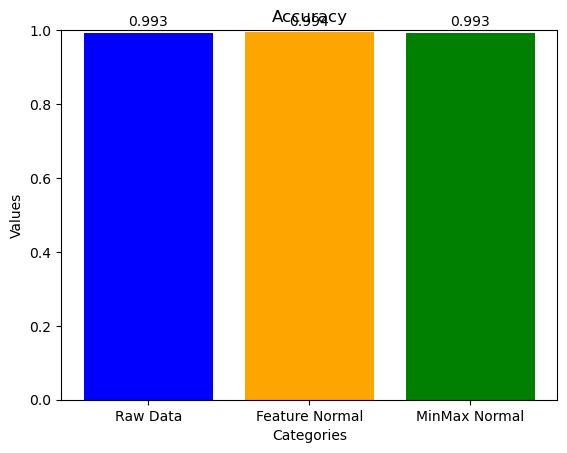

In [54]:
values2 = [cv_results2['test_accuracy_score'].mean(),cv_resultsStandard2['test_accuracy_score'].mean(),cv_resultsMinMax2['test_accuracy_score'].mean()]

plt.bar(categories, values2,color = colors)
for i, value in enumerate(values2):
    plt.annotate(f'{value:.3f}', xy=(i, value), xytext=(i, value + 0.01), ha='center', va='bottom')  

plt.ylim(0,1)
plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Accuracy')

plt.show()

In [22]:
set3 = pd.read_csv('pc3.csv',sep=",")

Y3 = np.array(set3.iloc[:, 37].astype(int))
X3 = np.array(set3.iloc[:,:37])


In [7]:
scorers3 = {
    'accuracy_score': make_scorer(accuracy_score),
    'balanced_accuracy_score': make_scorer(balanced_accuracy_score),
    'f1_score': make_scorer(f1_score, average='weighted')
}

cv= 5 

cv_results3 = cross_validate(LogisticRegression(solver='liblinear',max_iter=1000), X3, Y3, cv=cv, scoring=scorers3, return_train_score=True)

# print(cv_results)
print("Accuracy:", cv_results3['test_accuracy_score'].mean())
print("Balanced Accuracy:", cv_results3['test_balanced_accuracy_score'].mean())
print("F1:", cv_results3['test_f1_score'].mean())


Accuracy: 0.9001863684771033
Balanced Accuracy: 0.5872512074224707
F1: 0.8780455970045266


In [36]:
pipe3 = Pipeline([('scaler', StandardScaler()), ('logistic', LogisticRegression(solver='liblinear'))])
cv_resultsStandard3 = cross_validate(pipe3, X3, Y3, cv=cv, scoring=scorers3, return_train_score=True)
# print(cv_results)
print("Accuracy:", cv_resultsStandard3['test_accuracy_score'].mean())
print("Balanced Accuracy:", cv_resultsStandard3['test_balanced_accuracy_score'].mean())
print("F1:", cv_resultsStandard3['test_f1_score'].mean())

Accuracy: 0.8989084132055378
Balanced Accuracy: 0.5588532663955263
F1: 0.8706477839811881


In [37]:
pipeMinMax3 = Pipeline([('scaler', MinMaxScaler()), ('logistic', LogisticRegression(solver='liblinear'))])
cv_resultsMinMax3 = cross_validate(pipeMinMax3, X3, Y3, cv=cv, scoring=scorers3, return_train_score=True)
# print(cv_results)
print("Accuracy:", cv_resultsMinMax3['test_accuracy_score'].mean())
print("Balanced Accuracy:", cv_resultsMinMax3['test_balanced_accuracy_score'].mean())
print("F1:", cv_resultsMinMax3['test_f1_score'].mean())

Accuracy: 0.8969914802981895
Balanced Accuracy: 0.5162538129130656
F1: 0.8555395855807637


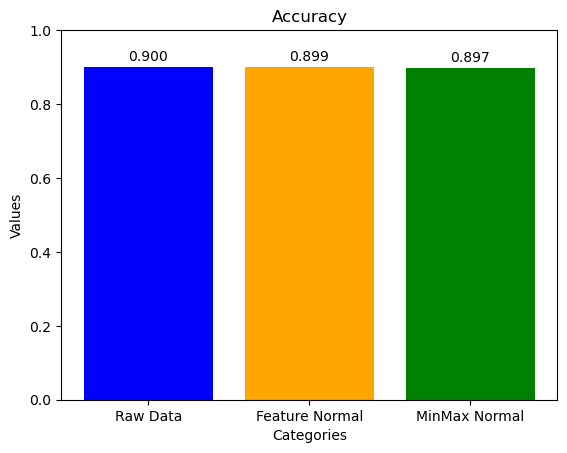

In [40]:
values3 = [cv_results3['test_accuracy_score'].mean(),cv_resultsStandard3['test_accuracy_score'].mean(),cv_resultsMinMax3['test_accuracy_score'].mean()]

plt.bar(categories, values3,color = colors)
for i, value in enumerate(values3):
    plt.annotate(f'{value:.3f}', xy=(i, value), xytext=(i, value + 0.01), ha='center', va='bottom')  

plt.ylim(0,1)
plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Accuracy')

plt.show()